## Imports

In [100]:
##imports
import patho
import hcl
import utils
import mem
import extr

from time import perf_counter
seed = 40

In [ ]:
#en cas de GPU (HCL)

do_gpu = False
if do_gpu:
    import torch
    device = torch.device("cpu")
    if torch.cuda.is_available():
        device = torch.device("cuda")
        torch.cuda.set_device(0)
        print("cuDNN enabled?",torch.backends.cudnn.enabled)
        print("cuDNN version:",torch.backends.cudnn.version())
        print("cude version:",torch.version.cuda)
        print("Device name?",torch.cuda.get_device_name(torch.cuda.current_device()))
else:
    device = None

## Dataset

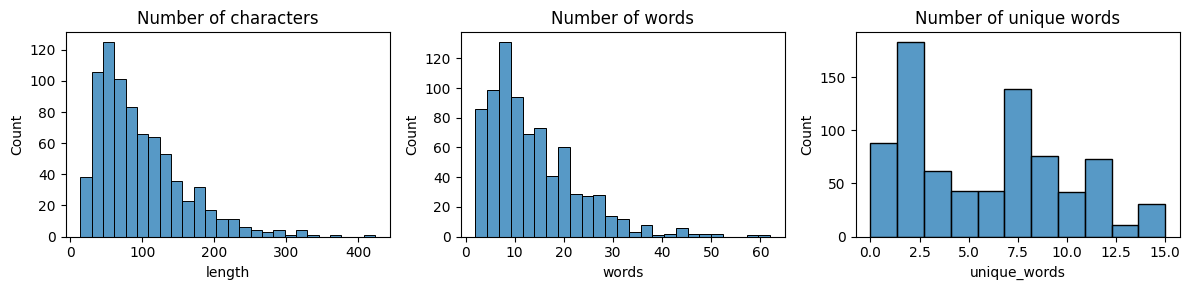

Mean length:  97.1
Mean number of words:  13.6
Mean number of unique words:  6.0


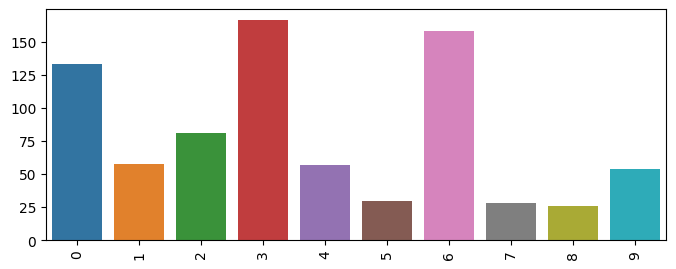

Size :  (791, 6)
Labels :  ['ADP' 'ANE' 'APNONEP' 'ATH' 'BR' 'CHIR' 'COND' 'CONG' 'DISSEC' 'EP']


In [101]:
utils.reload(patho)
df,labels = patho.get_label_df(seed)
_, means = hcl.show_df(df)
print("Size : ",df.shape)
print("Labels : ",labels)

In [102]:
#tokenize
utils.reload(utils)
utils.reload(hcl)
tokenizer = hcl.get_tokenizer("bert")
dataset = hcl.get_label_ds(df,tokenizer,seed)

Current dir :  E:\APPLIS\JupyterHub\berthelierex\notebooks
Loading from path : models/bert


In [ ]:
label_dicts = [{k:f"LABEL_{k}" for k in range(len(labels))},{key:k for k,key in enumerate(labels)}]

## Memorization

Accs :  0.76718


<Figure size 640x480 with 0 Axes>

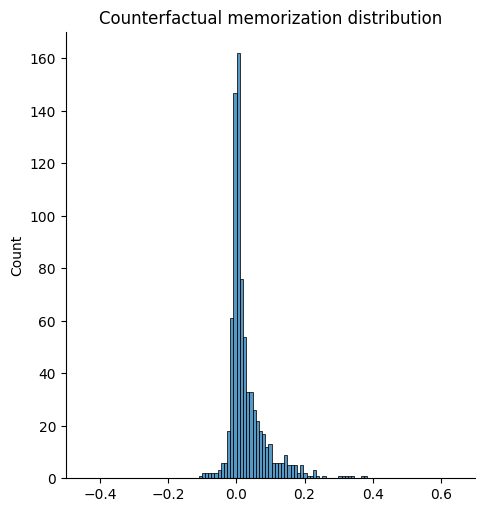

Number of counterfactuals for threshold : 0.3 :  7
Words with mem > 0.3
-----------------
Sizes :  30 242 133 33 112 130 40
Words :  3 35 24 4 16 19 4
Unique words :  3 31 19 4 15 18 4
Labels :  ['COND', 'COND', 'COND', 'CHIR', 'BR', 'ADP', 'CHIR']
--------------------
Done in 0.01 min


In [103]:
utils.reload(mem)
t1 = perf_counter()
real_mems = mem.mem_pipeline(dataset,tokenizer,label_dicts,means,real_t=0.2,n_counters=10,do_train=True,do_perf=True,model_dir="mem",seed=seed,num_train_epochs=3,print_results=True,is_hcl=True,model_name="bert")
utils.get_delay(t1)

## Data extraction

New dataset size:  257
Dataset distribution
Mean words :  39.7
Mean unique words :  34.0
Mean tokens :  99.9
Mean unique tokens :  77.6
Potentiel counterfactuals :  35
Training size :  236
Current bench:  [20, 60, 130, 190]
Generating prompts

Prompts:
Mean words:  [3.7, 8.9, 18.2, 25.9]
Mean unique words:  [3.6, 8.6, 16.8, 23.2]
Mean sizes:  [20.0, 60.0, 130.0, 190.0]
Starting extraction
Computing repetitions 0


E:\APPLIS\Anaconda3\envs\berthelierex\Lib\site-packages\transformers\generation\utils.py:1219: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation)
  warnings.warn(


Done
Computing repetitions 1
Done
Computing repetitions 2
Done
Computing repetitions 3
Done
--------------------
Done in 5.22 min

Outputs:
Mean words:  [8.9, 8.8, 8.8, 8.7]
Mean unique words:  [8.5, 8.3, 8.4, 8.2]
Mean sizes:  [59.9, 59.3, 59.3, 58.5]
Repartition :  [31, 17, 30, 22]
Total repetitions :  100

Percentage of extracted sequences
-----------------------------
Prompt size of 0.1 : 13.1 % extracted
Prompt size of 0.25 : 7.2 % extracted
Prompt size of 0.5 : 12.7 % extracted
Prompt size of 0.75 : 9.3 % extracted

Extracted:


E:\APPLIS\JupyterHub\berthelierex\notebooks\extr.py:351: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(ax = axes[0],data=list(words)).set(title=title)
E:\APPLIS\JupyterHub\berthelierex\notebooks\extr.py:352: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(ax = axes[1],data=list(uniques)).set(title=title)


Mean words:  [5.0, 5.4, 5.3, 5.5]
Mean unique words:  [5.0, 5.4, 5.1, 5.4]
Mean sizes:  [20.5, 19.5, 19.4, 20.2]

rep shapes:
reps:  [31, 17, 30, 22]
reps outputs:  [31, 17, 30, 22]
reps idx:  [31, 17, 30, 22]
Example repetition:
------------
From bench 0, prompt id 138:
menCalcifications ao
------------
Output:
ns de la crosse aorti
------------
Repeated text: 
ulmonaireadénomégalies médiastinales multiplesapparition d'une condensation linéaire lobaire inférieure gauche en faveur d'une atélectasieathéromatose aorto-iliaque diffusedilatation du tronc artériel pulmonaire à 33 mmdiscrètes calcifications de la crosse aortiquestabilité de l'atte

Extraction for counterfactuals
Repartition :  [0, 0, 1, 1]
Total repetitions :  2

Percentage of extracted sequences
-----------------------------
Prompt size of 0.1 : 0.0 % extracted
Prompt size of 0.25 : 0.0 % extracted
Prompt size of 0.5 : 0.4 % extracted
Prompt size of 0.75 : 0.4 % extracted

Extraction for test data
Current bench:  [5, 6, 7, 

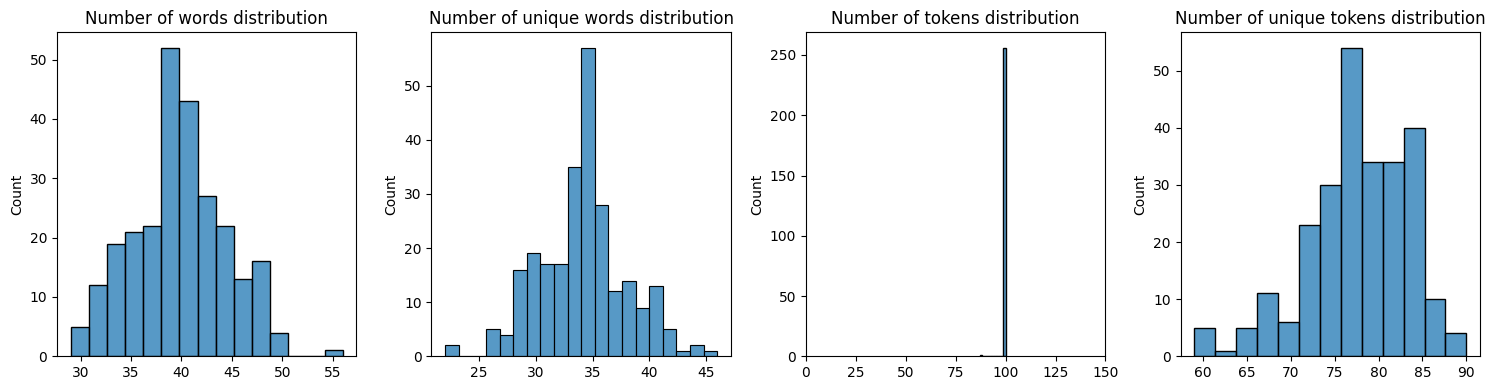

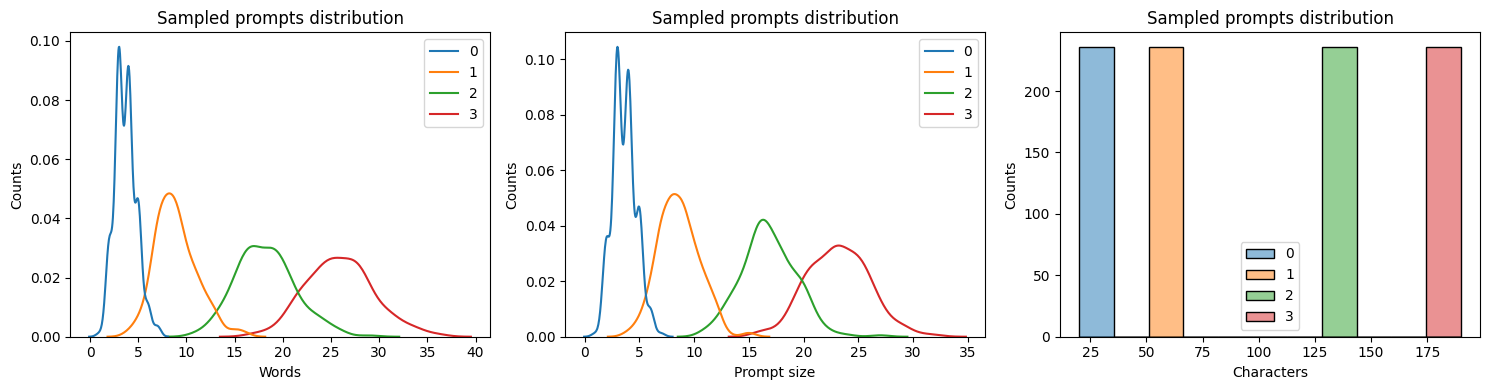

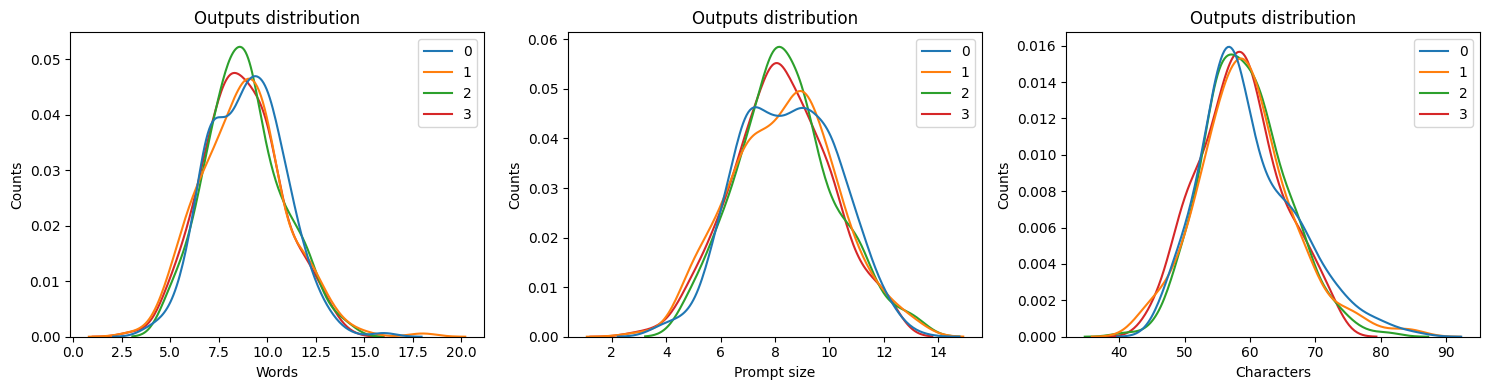

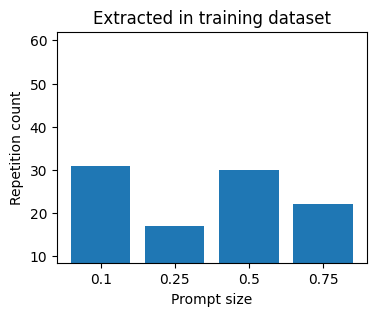

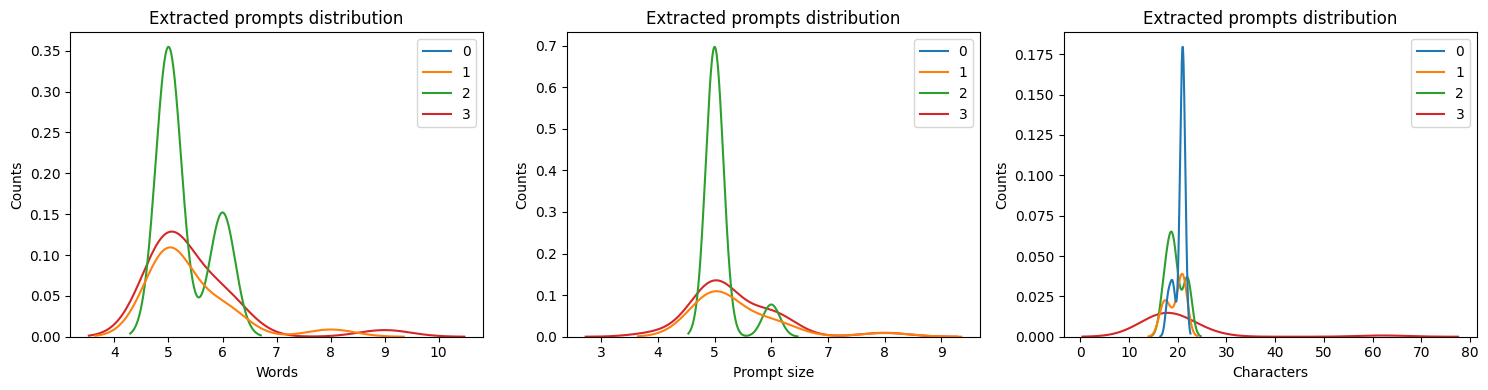

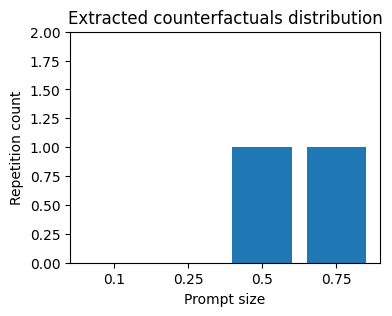

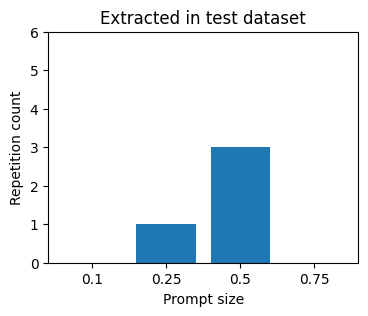

In [113]:
utils.reload(extr)
reps = extr.extr_pipeline(dataset,real_mems,context_length=100,seed=seed,do_training=True,max_new_tokens=20,do_prompts=True,bench_sizes=[0.1,0.25,0.5,0.75],min_size=15,min_words=4,save_dir="extr",print_graphs=True,hcl=True)

In [114]:
n=4
save_dir="extr"
basic_reps = [[] for k in range(n)]
for i in range(n):
    with open(f"{save_dir}/outputs/repetitions_{i}","r",encoding="utf8") as a:
        lines = a.readlines()                
    basic_reps[i]=extr.reconstruct_lines(lines,endline="[END]")
reps = [extr.get_unique_reps(basic_reps[k]) for k in range(n)]
rep_outputs = [extr.get_rep_outputs(reps[k]) for k in range(n)]
rep_outputs

[['ns de la crosse aorti',
  'ns de la crosse aorti',
  'ns de la crosse aorti',
  'ns de la crosse aorti',
  'ons de la crosse ao',
  'ons de la crosse ao',
  'ons de la crosse ao',
  'ons de la crosse ao',
  'ante mesurée à 40 ',
  'ante mesurée à 40 ',
  'ante mesurée à 40 ',
  ' de la crosse aortiqu',
  ' de la crosse aortiqu',
  ' de la crosse aortiqu',
  ' de la crosse aortiqu',
  ' de la crosse aortiqu',
  ' de la crosse aortiqu',
  ' de la crosse aortiqu',
  ' de la crosse aortiqu',
  ' de la crosse aortiqu',
  ' de la crosse aortiqu',
  ' de la crosse aortiqu',
  ' de la crosse aortiqu',
  ' de la crosse aortiqu',
  ' de la crosse aortiqu',
  ' de la crosse aortiqu',
  ' de la crosse aortiqu',
  ' de la crosse aortiqu',
  ' de la crosse aortiqu',
  ' de la crosse aortiqu',
  ' de la crosse aortiqu'],
 ['esurée à 32 mm de d',
  '/> et à 2 mm x 1 sca',
  '2 mm de petit axe',
  '2 mm de petit axe',
  '2 mm de petit axe',
  'e la crosse aortique ',
  'e la crosse aortique ',
  'e 

## MIA

## Federated Learning

## Differential privacy